# PW 1 - Markovian models - Chloé Court
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [3]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

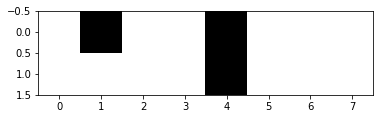

In [6]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

# Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



# A1  

$\quad U(x) = 7 \beta$

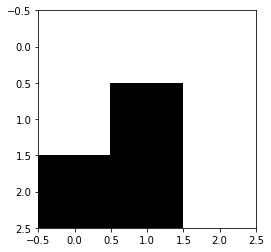

In [5]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

# Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


# A2  

Formule générale : $\quad P(X_s = x_s | {X_r = x_r}, r \ne s) = P_r(X_s = x_s | V_s)$

$
\left\{
\begin{array}{l}
U_s(0|1,1,1,1,1,0,0,1) = 6 \beta \\
U_s(1|1,1,1,1,1,0,0,1) = 2 \beta
\end{array}
\right.
$

Ainsi, $Z_s = e^{-6\beta} + e^{-2\beta}$

$\Rightarrow \left\{
\begin{array}{l}
P(X_s = 0 |0,1,1,1,0,0,1,1) = \frac {1}{1+e^{4\beta}} \\
P(X_s = 1 |0,1,1,1,0,0,1,1) = \frac {1}{1+e^{-4\beta}}
\end{array}
\right.$ 

La classe la plus probable est donc la classe 1.


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



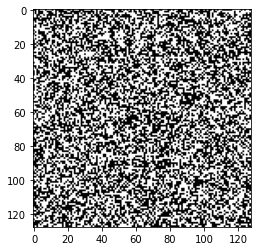

In [7]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [27]:
def echan(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=beta_reg*(im_bin[i1,j] + im_bin[i2,j] + im_bin[i,j1] + im_bin[i,j2])
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=beta_reg*(4 - im_bin[i1,j] - im_bin[i2,j] - im_bin[i,j1] - im_bin[i,j2])
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

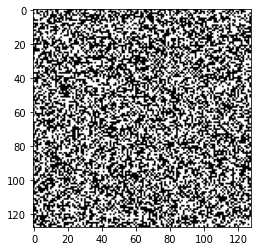

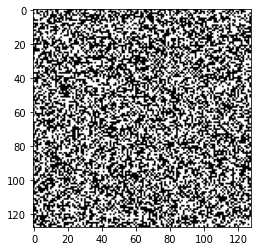

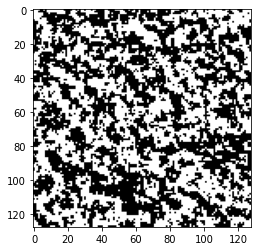

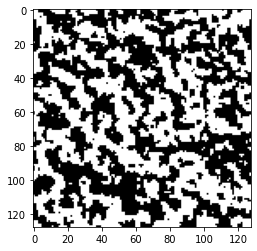

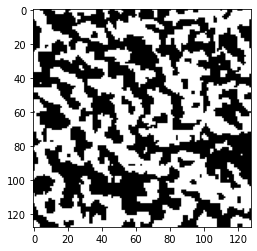

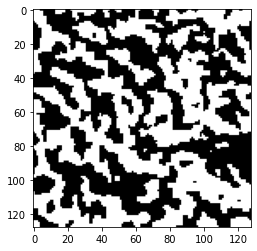

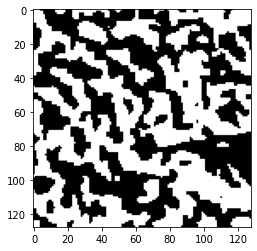

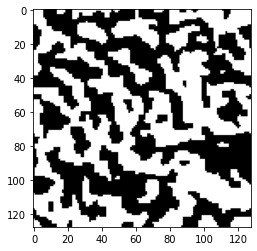

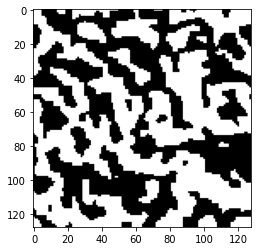

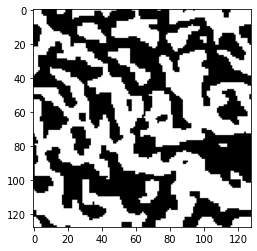

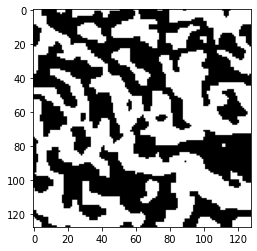

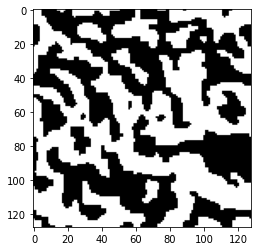

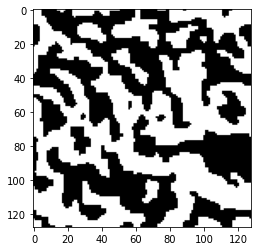

In [28]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 5

mafigure=plt.figure()
plt.imshow(im_bin)
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

# Q3
Run the program several times. Do you still get the same image? Comment on this.

# A3  

> On n'obtient pas toujours la même image lors de plusieurs exécutions. Cela s'explique parce que le seuil pour la génération des pixels est aléatoire.

# Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

# A4  

> Lorsque $\beta = 0,5$, les résultats sont proches de l'image initiale, tandis qu'en augmentant $\beta$ (par exemple pour $\beta = 20$), on observe la formation de zones noires et blanches.

# Q5
Which image minimizes the overall energy for this model?

# A5
> Pour ce modèle, l'image qui minimise l'énergie est une image pour laquelle il n'y aurait pas de transition, soit une image entièrement blanche ou entièrement noire.

# Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

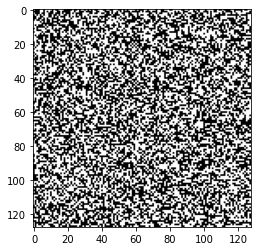

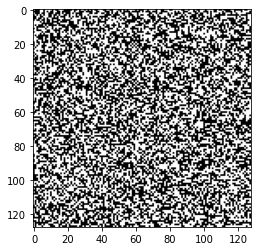

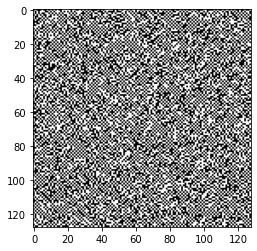

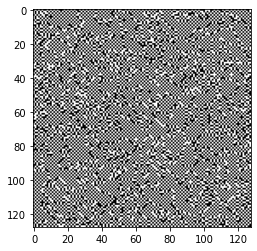

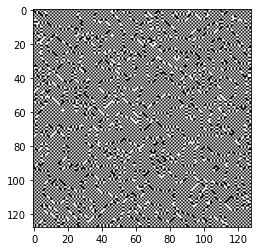

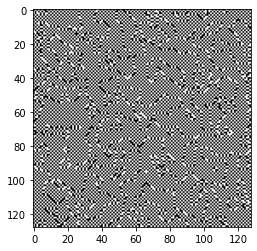

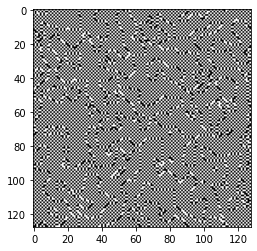

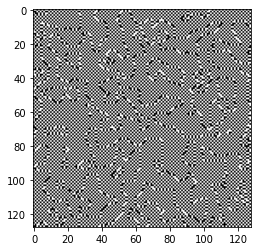

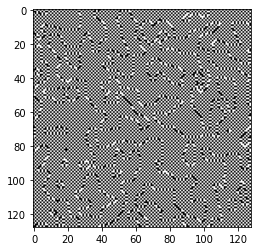

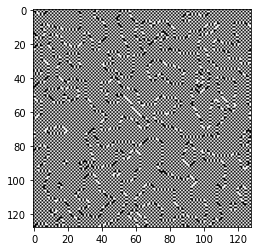

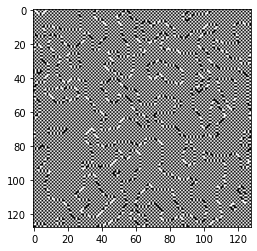

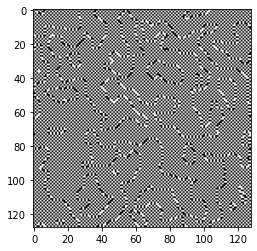

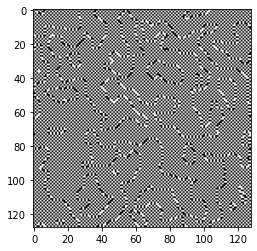

In [29]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -5

mafigure=plt.figure()
plt.imshow(im_bin)
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

# A6

> Lorsque $\beta$ est négatif, cela revient à ne plus avoir de "-" dans l'exponentielle. Ainsi, à chaque itération, l'énergie de l'image augmente, donc on a de plus en plus de transitions (car $\beta$ est le potentiel pour les transitions dans ce modèle). L'image va donc tendre vers une alternance parfaite de pixels noirs et de pixels blancs.

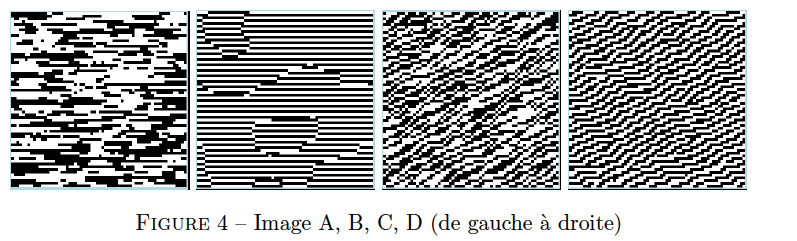

# Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.


# A7

* Image A : Le seul potentiel de clique d'ordre 2 non nul (et égal à 1) est celui du clique horizontal. En effet, comme on souhaite à favoriser les configurations en lignes (horizontales), il faut favoriser horizontalement le fait qu'il n'y ait pas de transitions. Il faut pour cela utiliser un $\beta$ négatif qui va favoriser cette configuration. Ainsi pour ce clique que l'on note $c_1$, $U_{c_1}(1,1)=U_{c_1}(0,0)=-1$. On aurait aussi pu mettre un $\beta$ positif sur la configuration verticale.

* Image B : Pour favoriser d'autant plus la formation de lignes, on peut donc, en plus de ce qui a été fait pour l'image A, utiliser un $\beta$ positif (ici égal à 1) pour un clique vertical. Ainsi pour ce clique que l'on note $c_2$, $U_{c_2}(1,1)=U_{c_2}(0,0)=1$ Cela va faire apparaître plus fréquemment les transitions verticales.

* Image C : On souhaite désormais favoriser le fait qu'il n'y ait pas de transitions diagonales (pour la diagonale à 45°, ie de en bas à gauche à en haut à droite). Pour cela, de la même façon, on doit avoir un potentiel négatif pour le clique diagonal (45°). Ainsi, pour ce clique que l'on note $c_3$, $U_{c_3}(1,1)=U_{c_3}(0,0)=-1$.

* Image D : Pour obtenir cette image, on peut utiliser le clique diagonal (135°, ie de en bas à droite à en haut à gauche). Pour ce clique que l'on note $c_4$, $U_{c_4}(1,1)=U_{c_4}(0,0)=1$.


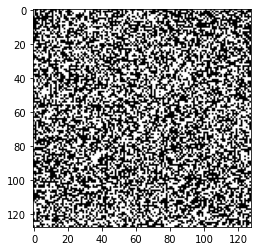

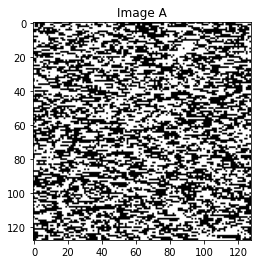

In [54]:
# image A :
def echan_horiz(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=beta_reg*(2 - im_bin[i,j1] - im_bin[i,j2])
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=beta_reg*(im_bin[i,j1] + im_bin[i,j2])
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -1

for n in range(100):
    echan_horiz(im_bin,beta_reg)

plt.figure()
plt.title("Image A")
plt.imshow(im_bin)
plt.show()

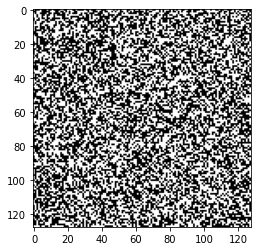

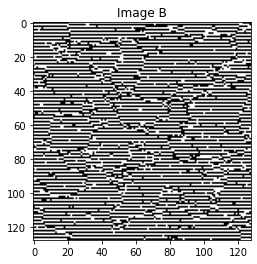

In [56]:
#image B
def echan_2(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=beta_reg*(2 - im_bin[i,j1] - im_bin[i,j2]) -beta_reg * (2 - im_bin[i1,j] - im_bin[i2,j])
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=beta_reg*(im_bin[i,j1] + im_bin[i,j2])-beta_reg * (im_bin[i1,j] + im_bin[i2,j])
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -1

for n in range(100):
    echan_2(im_bin,beta_reg)

plt.figure()
plt.title("Image B")
plt.imshow(im_bin)
plt.show()

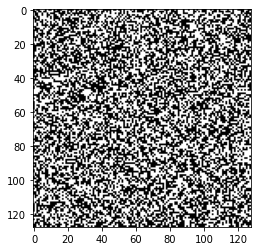

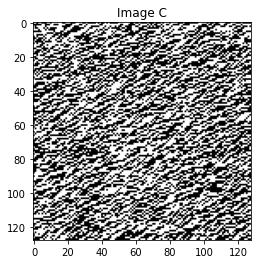

In [61]:
#image C
def echan_3(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=beta_reg*(4 - im_bin[i,j1] - im_bin[i,j2] - im_bin[i2,j1] - im_bin[i1,j2]) -beta_reg * (2 - im_bin[i1,j] - im_bin[i2,j])
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=beta_reg*(im_bin[i,j1] + im_bin[i,j2] + im_bin[i2,j1] + im_bin[i1,j2])-beta_reg * (im_bin[i1,j] + im_bin[i2,j])
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -1

for n in range(100):
    echan_3(im_bin,beta_reg)

plt.figure()
plt.title("Image C")
plt.imshow(im_bin)
plt.show()

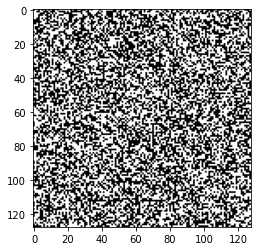

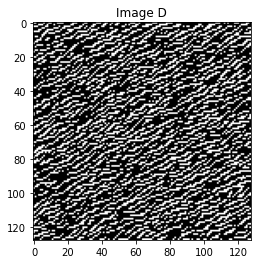

In [63]:
#image D
def echan_4(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=beta_reg*(4 - im_bin[i,j1] - im_bin[i,j2] - im_bin[i2,j1] - im_bin[i1,j2]) -beta_reg * (2 - im_bin[i1,j] - im_bin[i2,j] - im_bin[i1,j1] - im_bin[i2,j2])
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=beta_reg*(im_bin[i,j1] + im_bin[i,j2] + im_bin[i2,j1] + im_bin[i1,j2])-beta_reg * (im_bin[i1,j] + im_bin[i2,j] + im_bin[i1,j1] + im_bin[i2,j2])
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -1

for n in range(100):
    echan_4(im_bin,beta_reg)

plt.figure()
plt.title("Image D")
plt.imshow(im_bin)
plt.show()

# Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

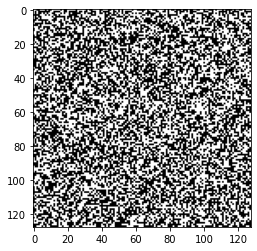

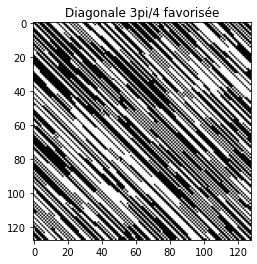

In [72]:
def echan_4(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=beta_reg*(2- im_bin[i1,j1] - im_bin[i2,j2])
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=beta_reg*(im_bin[i1,j1] + im_bin[i2,j2])
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= -5

for n in range(100):
    echan_4(im_bin,beta_reg)

plt.figure()
plt.title("Diagonale 3pi/4 favorisée")
plt.imshow(im_bin)
plt.show()

# A8

Pour favoriser la diagonale $\frac{3\pi}{4}$, nous avons utilisé un $\beta$ négatif pour les potentiels $U_c(0,0)$ et $U_c(1,1)$ avec c le clique diagonal ($\frac{3\pi}{4}$). On observe comme attendu des lignes diagonales noires ou blanches.